<a href="https://colab.research.google.com/github/Usman548/Postdoctoral-Technical-Challenge/blob/main/Complete_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Complete Google Colab Notebook for All Three Tasks

In [1]:
# @title 📦 Step 1: Clone Repository and Setup

import os
import sys
from pathlib import Path

print("="*60)
print("PNEUMONIA MULTI-MODAL AI SYSTEM")
print("="*60)

# Clone your GitHub repository
# Replace with your actual GitHub URL
repo_url = "https://github.com/Usman548/Postdoctoral-Technical-Challenge.git"

print(f"\n📂 Cloning repository: {repo_url}")
!git clone {repo_url}

# Get repository name from URL
repo_name = repo_url.split('/')[-1].replace('.git', '')
%cd {repo_name}

print(f"\n✅ Current directory: {os.getcwd()}")
!ls -la

PNEUMONIA MULTI-MODAL AI SYSTEM

📂 Cloning repository: https://github.com/Usman548/Postdoctoral-Technical-Challenge.git
Cloning into 'Postdoctoral-Technical-Challenge'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 239 (delta 67), reused 179 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (239/239), 11.93 MiB | 10.61 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/Postdoctoral-Technical-Challenge

✅ Current directory: /content/Postdoctoral-Technical-Challenge
total 68
drwxr-xr-x 12 root root 4096 Feb 20 07:33 .
drwxr-xr-x  1 root root 4096 Feb 20 07:33 ..
drwxr-xr-x  3 root root 4096 Feb 20 07:33 core
drwxr-xr-x  3 root root 4096 Feb 20 07:33 data
drwxr-xr-x  8 root root 4096 Feb 20 07:33 .git
-rw-r--r--  1 root root   66 Feb 20 07:33 .gitattributes
drwxr-xr-x  5 root root 4096 Feb 20 07:33 models
drwxr-xr-x  2 root root 4096 Feb 20 07:33 notebooks
-rw-r--

In [2]:
# @title 📦 Step 2: Install Dependencies

print("="*60)
print("INSTALLING DEPENDENCIES")
print("="*60)

# Install from requirements.txt
!pip install -q -r requirements.txt

# Install additional packages for token handling
!pip install -q python-dotenv huggingface-hub

# Verify installations
import torch
import transformers
import faiss
import medmnist

print(f"\n✅ PyTorch version: {torch.__version__}")
print(f"✅ Transformers version: {transformers.__version__}")
print(f"✅ FAISS version: {faiss.__version__}")
print(f"✅ MedMNIST version: {medmnist.__version__}")
print(f"✅ CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")
    !nvidia-smi --query-gpu=memory.total --format=csv,noheader,nounits

INSTALLING DEPENDENCIES
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.8 MB/s eta 0:00:00

✅ PyTorch version: 2.10.0+cu128
✅ Transformers version: 5.0.0
✅ FAISS version: 1.13.2
✅ MedMNIST version: 3.0.2
✅ CUDA Available: True
✅ GPU: Tesla T4
15360


In [3]:
# @title 🔑 Step 3: HuggingFace Token Setup (Required for Task 2)

import os
from getpass import getpass
from pathlib import Path
import sys
from google.colab import userdata

print("="*60)
print("🔑 HUGGINGFACE TOKEN SETUP")
print("="*60)
print("\nTo use MedGemma for Task 2, you need a HuggingFace token.")
print("Get your token at: https://huggingface.co/settings/tokens")
print("Request access to: https://huggingface.co/google/medgemma-4b-it")

# Try multiple methods to get token
HF_TOKEN = None


# Method 1: Check if already in environment
HF_TOKEN = userdata.get('HF_TOKEN')
if HF_TOKEN:
    print("✅ Found token in environment variables")

# Method 2: Check for .env file
if not HF_TOKEN:
    env_path = Path('.env')
    if env_path.exists():
        with open(env_path, 'r') as f:
            for line in f:
                if line.startswith('HF_TOKEN='):
                    HF_TOKEN = line.strip().split('=')[1]
                    print("✅ Found token in .env file")
                    break

# Method 3: Check Google Colab Secrets
if not HF_TOKEN:
    try:
        from google.colab import userdata
        HF_TOKEN = userdata.get('HF_TOKEN')
        print("✅ Found token in Colab Secrets")
    except:
        pass

# Method 4: Ask user to input
if not HF_TOKEN:
    print("\n📝 Please enter your HuggingFace token")
    HF_TOKEN = getpass("Token: ")

    # Option to save for next time
    save = input("\nSave token to .env file for future sessions? (y/n): ").lower()
    if save == 'y':
        with open('.env', 'w') as f:
            f.write(f'HF_TOKEN={HF_TOKEN}')
        print("✅ Token saved to .env file")
        print("⚠️  Make sure .env is in your .gitignore!")

# Set environment variable
os.environ['HF_TOKEN'] = HF_TOKEN
print(f"\n✅ Token set: {HF_TOKEN[:5]}...{HF_TOKEN[-5:]}")

# Verify token works
print("\n🔄 Verifying token...")
from huggingface_hub import whoami
try:
    user = whoami(token=HF_TOKEN)
    print(f"✅ Successfully logged in as: {user['name']}")
    print("✅ Token is valid and ready for Task 2!")
except Exception as e:
    print(f"❌ Token validation failed: {e}")
    print("Please check your token and try again.")

# Create a helper function for Task 2
def get_hf_token():
    """Helper function to get HF token for Task 2 notebooks"""
    return os.environ.get('HF_TOKEN')

print("\n✅ Token setup complete! You can now run Task 2.")

🔑 HUGGINGFACE TOKEN SETUP

To use MedGemma for Task 2, you need a HuggingFace token.
Get your token at: https://huggingface.co/settings/tokens
Request access to: https://huggingface.co/google/medgemma-4b-it
✅ Found token in environment variables

✅ Token set: hf_En...PYuyH

🔄 Verifying token...
✅ Successfully logged in as: usman548
✅ Token is valid and ready for Task 2!

✅ Token setup complete! You can now run Task 2.


In [4]:
# @title 💾 Step 4: Mount Google Drive to Save Results (Optional)

from google.colab import drive
drive.mount('/content/drive')

# Create folders in Drive
!mkdir -p /content/drive/MyDrive/pneumonia_ai/models
!mkdir -p /content/drive/MyDrive/pneumonia_ai/reports

print("\n✅ Google Drive mounted")
print("📁 Models will be saved to: /content/drive/MyDrive/pneumonia_ai/models")
print("📁 Reports will be saved to: /content/drive/MyDrive/pneumonia_ai/reports")

# Create symlinks (optional)
!ln -sf /content/drive/MyDrive/pneumonia_ai/models ./models/drive_models
!ln -sf /content/drive/MyDrive/pneumonia_ai/reports ./reports/drive_reports

Mounted at /content/drive

✅ Google Drive mounted
📁 Models will be saved to: /content/drive/MyDrive/pneumonia_ai/models
📁 Reports will be saved to: /content/drive/MyDrive/pneumonia_ai/reports


In [5]:
# @title 🔍 Step 5: Test Token with MedGemma (Optional)

import os

print("="*60)
print("TESTING HUGGINGFACE TOKEN WITH MEDGEMMA")
print("="*60)

HF_TOKEN = userdata.get('HF_TOKEN')

if not HF_TOKEN:
    print("❌ No token found! Please run Step 3 first.")
else:
    print(f"✅ Token found: {HF_TOKEN[:5]}...{HF_TOKEN[-5:]}")

    # Test loading a small part of the model
    print("\n🔄 Testing token with MedGemma...")
    from transformers import AutoConfig

    try:
        # Just test config loading (doesn't download full model)
        config = AutoConfig.from_pretrained(
            "google/medgemma-4b-it",
            token=HF_TOKEN,
            trust_remote_code=True
        )
        print("✅ Token works! You can now run Task 2.")
        print("📝 Model architecture:", config.architectures[0] if config.architectures else "Unknown")
    except Exception as e:
        print(f"❌ Token test failed: {e}")
        print("Please check:")
        print("1. Token is correct")
        print("2. You have requested access at: https://huggingface.co/google/medgemma-4b-it")
        print("3. Your account has been granted access")

TESTING HUGGINGFACE TOKEN WITH MEDGEMMA
✅ Token found: hf_En...PYuyH

🔄 Testing token with MedGemma...


config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

✅ Token works! You can now run Task 2.
📝 Model architecture: Gemma3ForConditionalGeneration


In [ ]:
# @title 📊 Step 6: Run Task 1 - CNN Classification

print("="*60)
print("TASK 1: CNN CLASSIFICATION")
print("="*60)


print("\n🔄 Option B: Running training directly")
%cd task1_classification

# Train with custom parameters
model_name = "resnet18"  # 'custom', 'resnet18', 'efficientnet-b0', 'vit-tiny'
batch_size = 32
epochs = 1  # Increase for better results

!python train.py --model {model_name} --batch_size {batch_size} --epochs {epochs}

# Evaluate
!python evaluate.py --model_path models/saved/best_model_{model_name}.pth --model_name {model_name}

%cd ..

print("\n✅ Task 1 completed!")

TASK 1: CNN CLASSIFICATION

🔄 Option B: Running training directly
/content/Postdoctoral-Technical-Challenge/task1_classification
2026-02-19 14:01:01 - __main__ - INFO - ============================================================
INFO:__main__:============================================================
2026-02-19 14:01:01 - __main__ - INFO - PNEUMONIA CLASSIFICATION TRAINING
INFO:__main__:PNEUMONIA CLASSIFICATION TRAINING
2026-02-19 14:01:01 - __main__ - INFO - ============================================================
INFO:__main__:============================================================
2026-02-19 14:01:01 - __main__ - INFO - PyTorch version: 2.9.0+cu128
INFO:__main__:PyTorch version: 2.9.0+cu128
2026-02-19 14:01:01 - __main__ - INFO - CPU cores available: 1
INFO:__main__:CPU cores available: 1
2026-02-19 14:01:01 - __main__ - INFO - Using device: CPU (as specified)
INFO:__main__:Using device: CPU (as specified)
2026-02-19 14:01:01 - __main__ - INFO - Set number of CPU threads

TASK 1 RESULTS

📊 Performance Metrics:
   Accuracy:  0.8510
   Precision: 0.8249
   Recall:    0.9667
   F1-Score:  0.8902
   AUC:       0.9223

📈 Confusion Matrix:


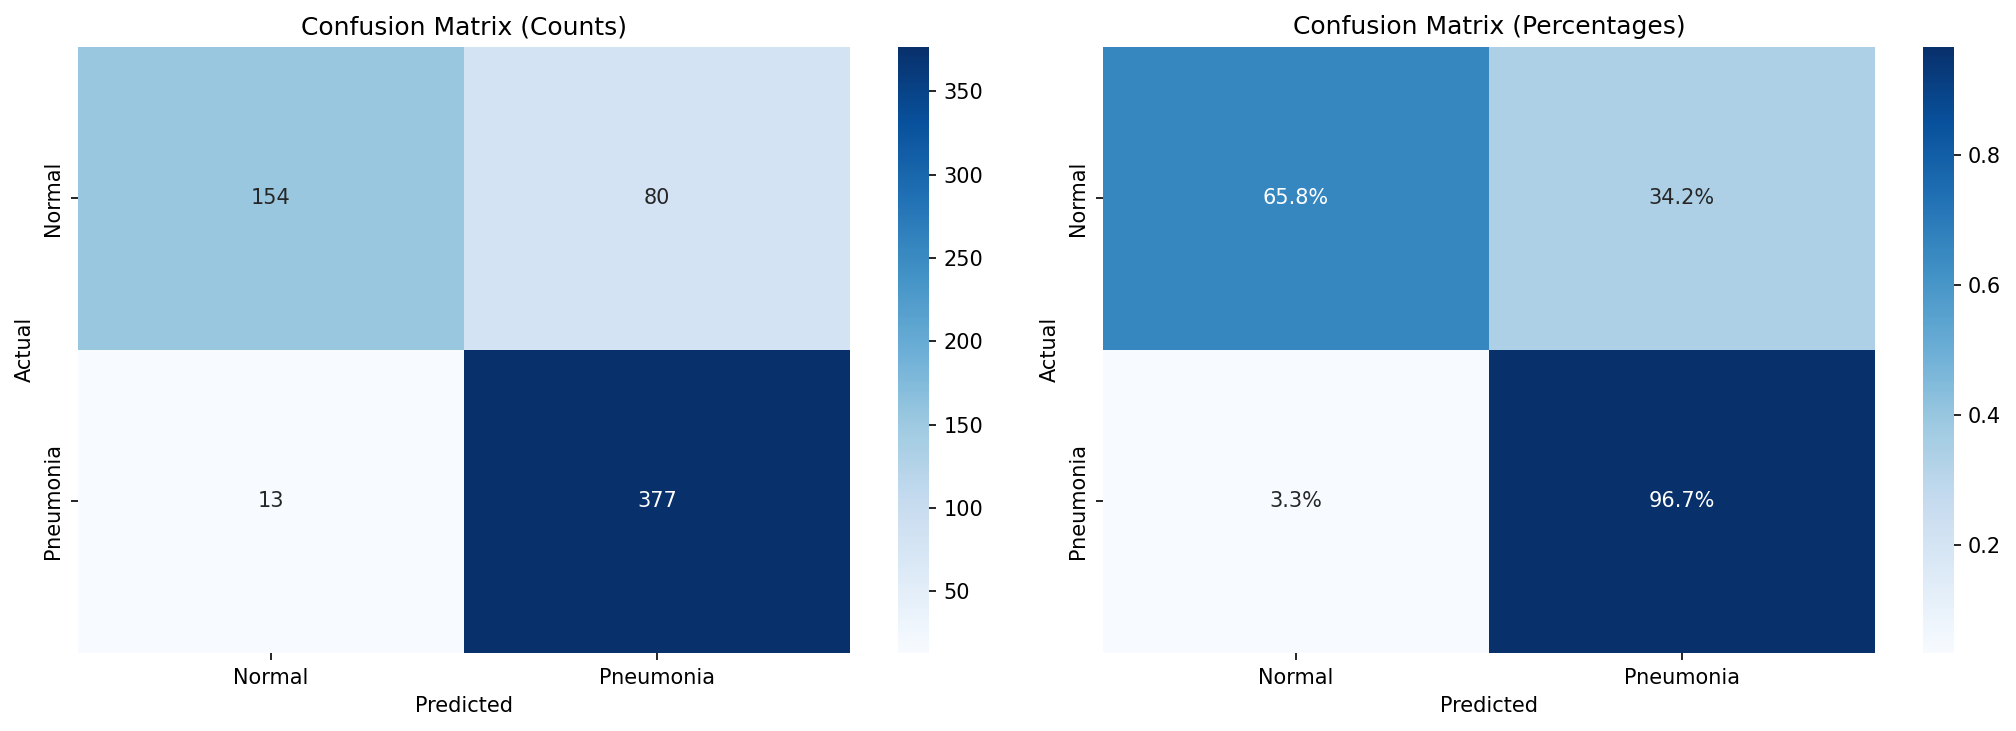


📈 ROC Curve:


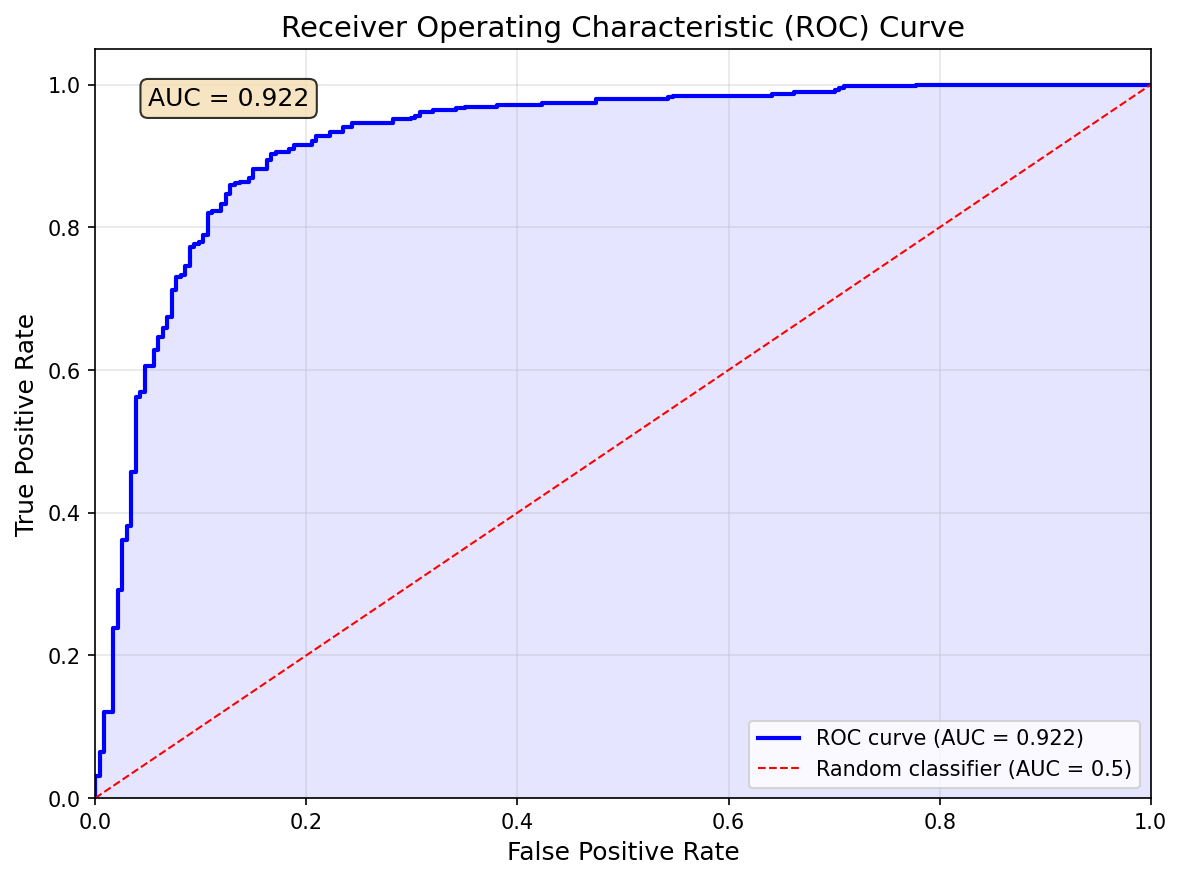


📈 Training Curves:


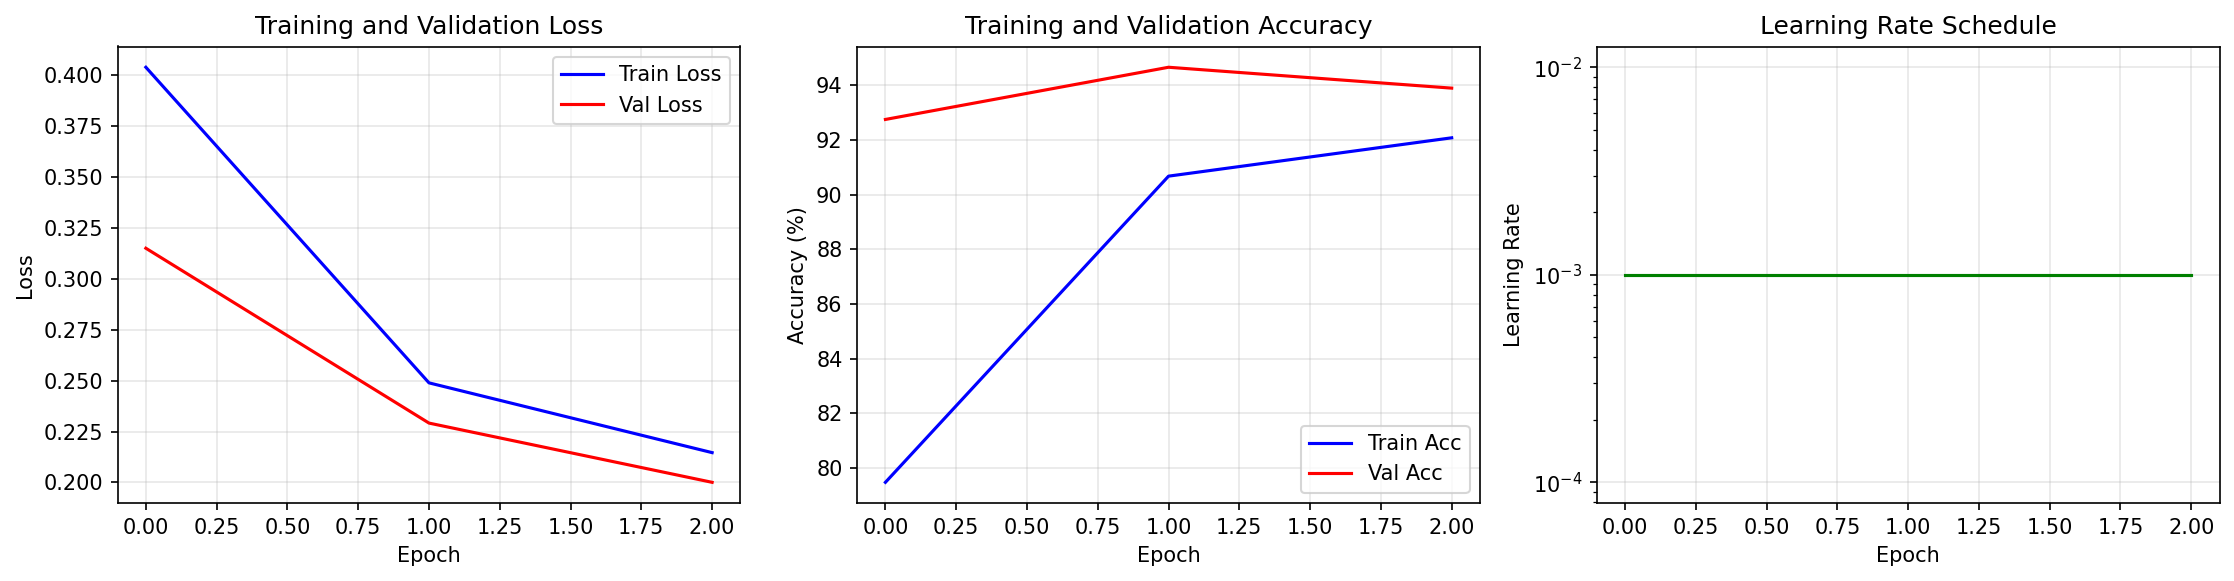


📈 Failure Cases:


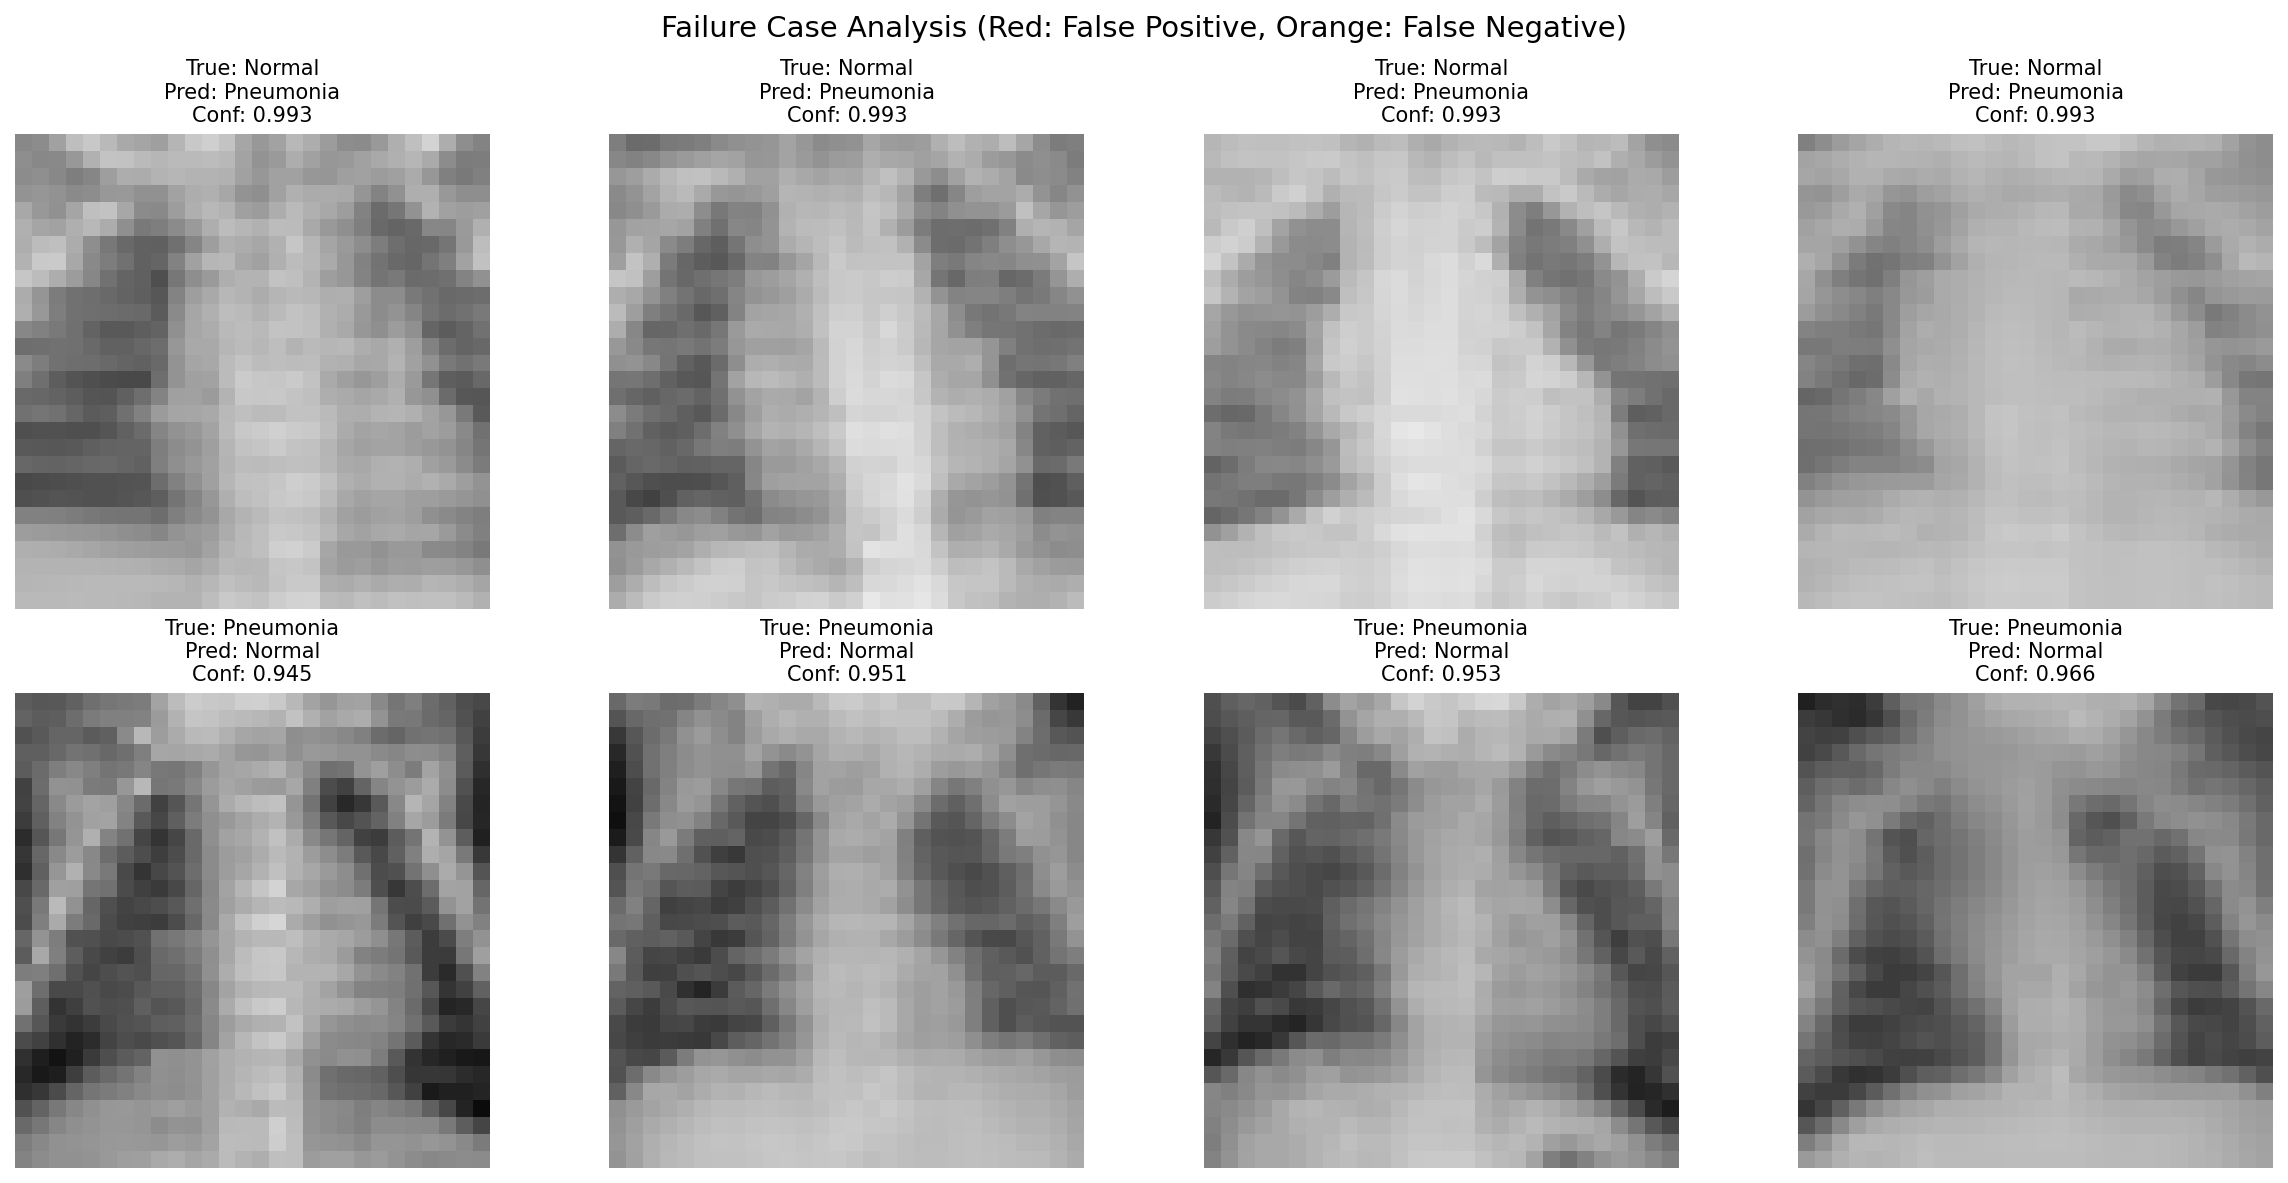

In [ ]:
# @title 📊 Step 7: View Task 1 Results
import json
import matplotlib.pyplot as plt
from IPython.display import Image, display

print("="*60)
print("TASK 1 RESULTS")
print("="*60)

# Load metrics
results_file = Path('reports/task1/evaluation_results.json')
if results_file.exists():
    with open(results_file, 'r') as f:
        results = json.load(f)

    metrics = results.get('metrics', {})
    print("\n📊 Performance Metrics:")
    print(f"   Accuracy:  {metrics.get('accuracy', 0):.4f}")
    print(f"   Precision: {metrics.get('precision', 0):.4f}")
    print(f"   Recall:    {metrics.get('recall', 0):.4f}")
    print(f"   F1-Score:  {metrics.get('f1_score', 0):.4f}")
    print(f"   AUC:       {metrics.get('auc', 0):.4f}")

# Display figures
figures = {
    "Confusion Matrix": "reports/task1/figures/confusion_matrix.png",
    "ROC Curve": "reports/task1/figures/roc_curve.png",
    "Training Curves": "reports/task1/figures/training_curves.png",
    "Failure Cases": "reports/task1/figures/failure_cases.png"
}

for title, path in figures.items():
    if Path(path).exists():
        print(f"\n📈 {title}:")
        display(Image(filename=path))

In [6]:
# @title 📝 Step 8: Run Task 2 - Medical Report Generation
print("="*60)
print("TASK 2: MEDICAL REPORT GENERATION")
print("="*60)

# Check if token is set
HF_TOKEN = userdata.get('HF_TOKEN')
if not HF_TOKEN:
    print("❌ HF_TOKEN not set! Please run Step 3 first.")
else:
    print(f"✅ HF_TOKEN is set: {HF_TOKEN[:5]}...{HF_TOKEN[-5:]}")

    # Option B: Run generate.py directly
    print("\n🔄 Running report generation")
    %cd task2_report_generation

    # Generate reports (token will be picked up from environment)
    !python generate_reports.py --token {HF_TOKEN}

    %cd ..

    print("\n✅ Task 2 completed!")

TASK 2: MEDICAL REPORT GENERATION
✅ HF_TOKEN is set: hf_En...PYuyH

🔄 Running report generation
/content/Postdoctoral-Technical-Challenge/task2_report_generation
INFO:__main__:Initializing MedGemma-4b-it report generator...
INFO:__main__:Using device: cuda
INFO:__main__:Loading google/medgemma-4b-it...
INFO:__main__:Using 4-bit quantization
INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/medgemma-4b-it/resolve/main/processor_config.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://huggingface.co/google/medgemma-4b-it/resolve/main/processor_config.json "HTTP/1.1 200 OK"
processor_config.json: 100% 70.0/70.0 [00:00<00:00, 336kB/s]
INFO:httpx:HTTP Request: GET https://huggingface.co/api/models/google/medgemma-4b-it/tree/main/additional_chat_templates?recursive=false&expand=false "HTTP/1.1 404 Not Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/medgemma-4b-it/resolve/main/processor_config.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: HEAD https://

TASK 2 RESULTS

📊 Prompt Performance:
--------------------------------------------------
Prompt               Avg Words    Agreement   
--------------------------------------------------

📸 Found 4 report images

📄 sample_0_report.png:


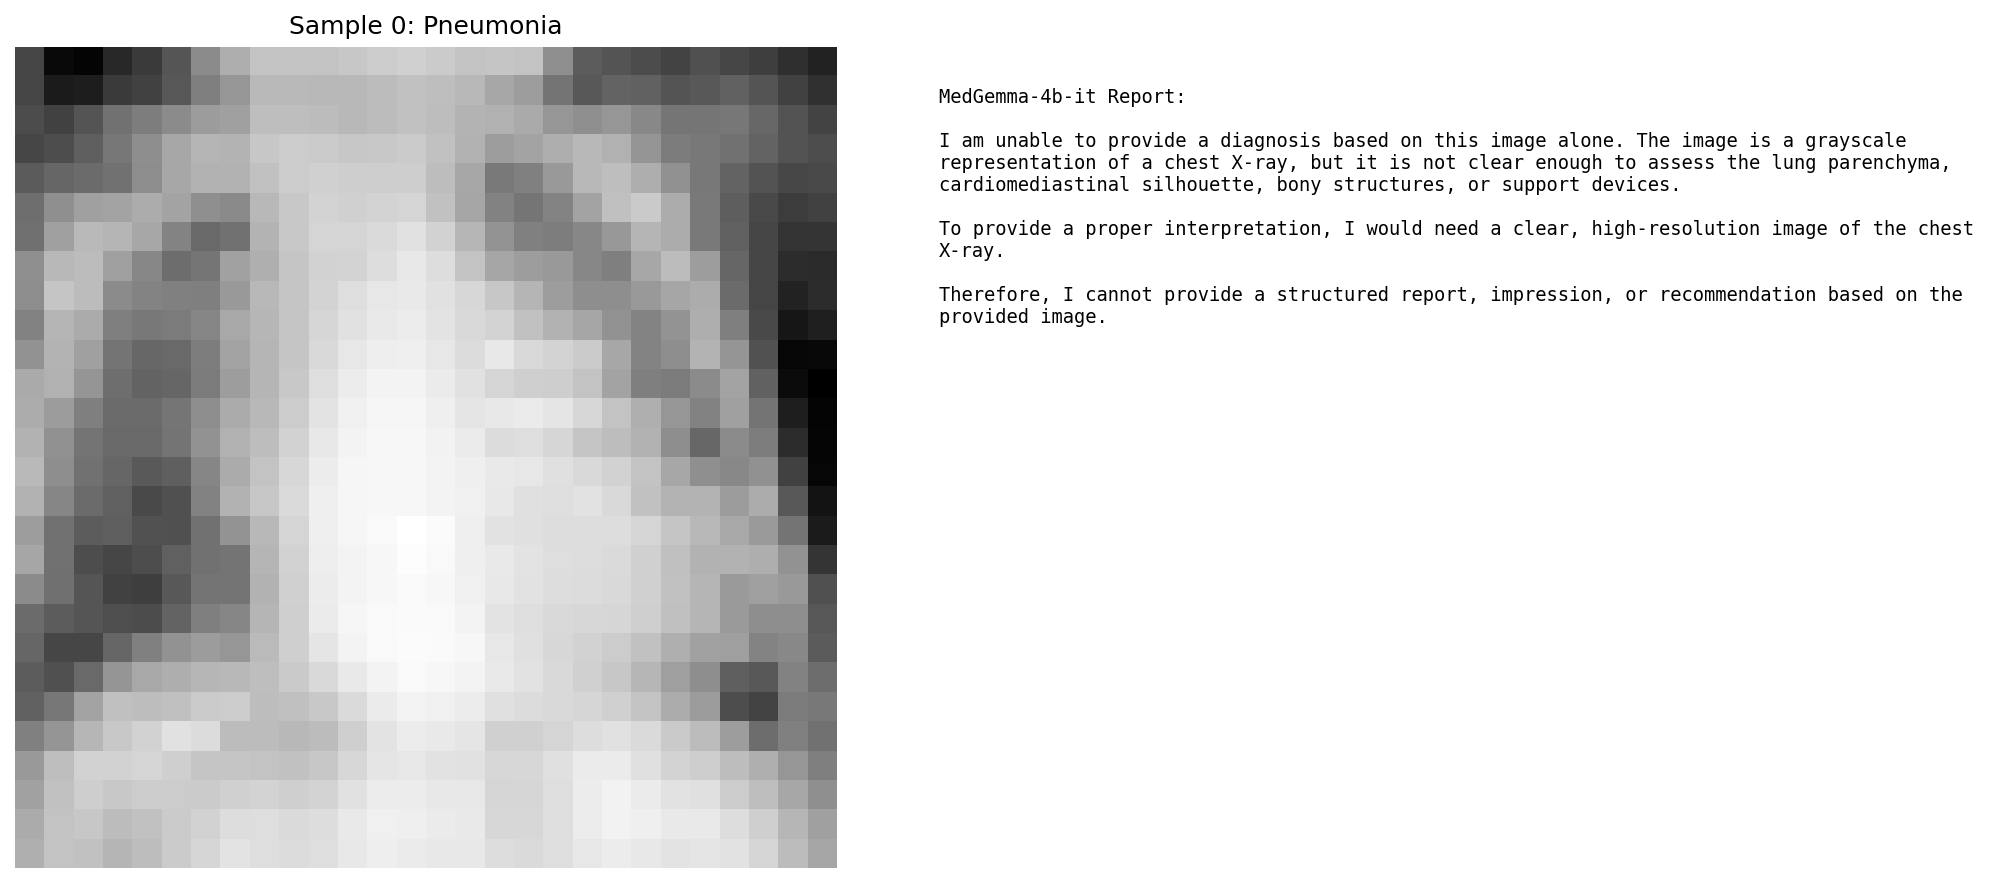


📄 sample_1_report.png:


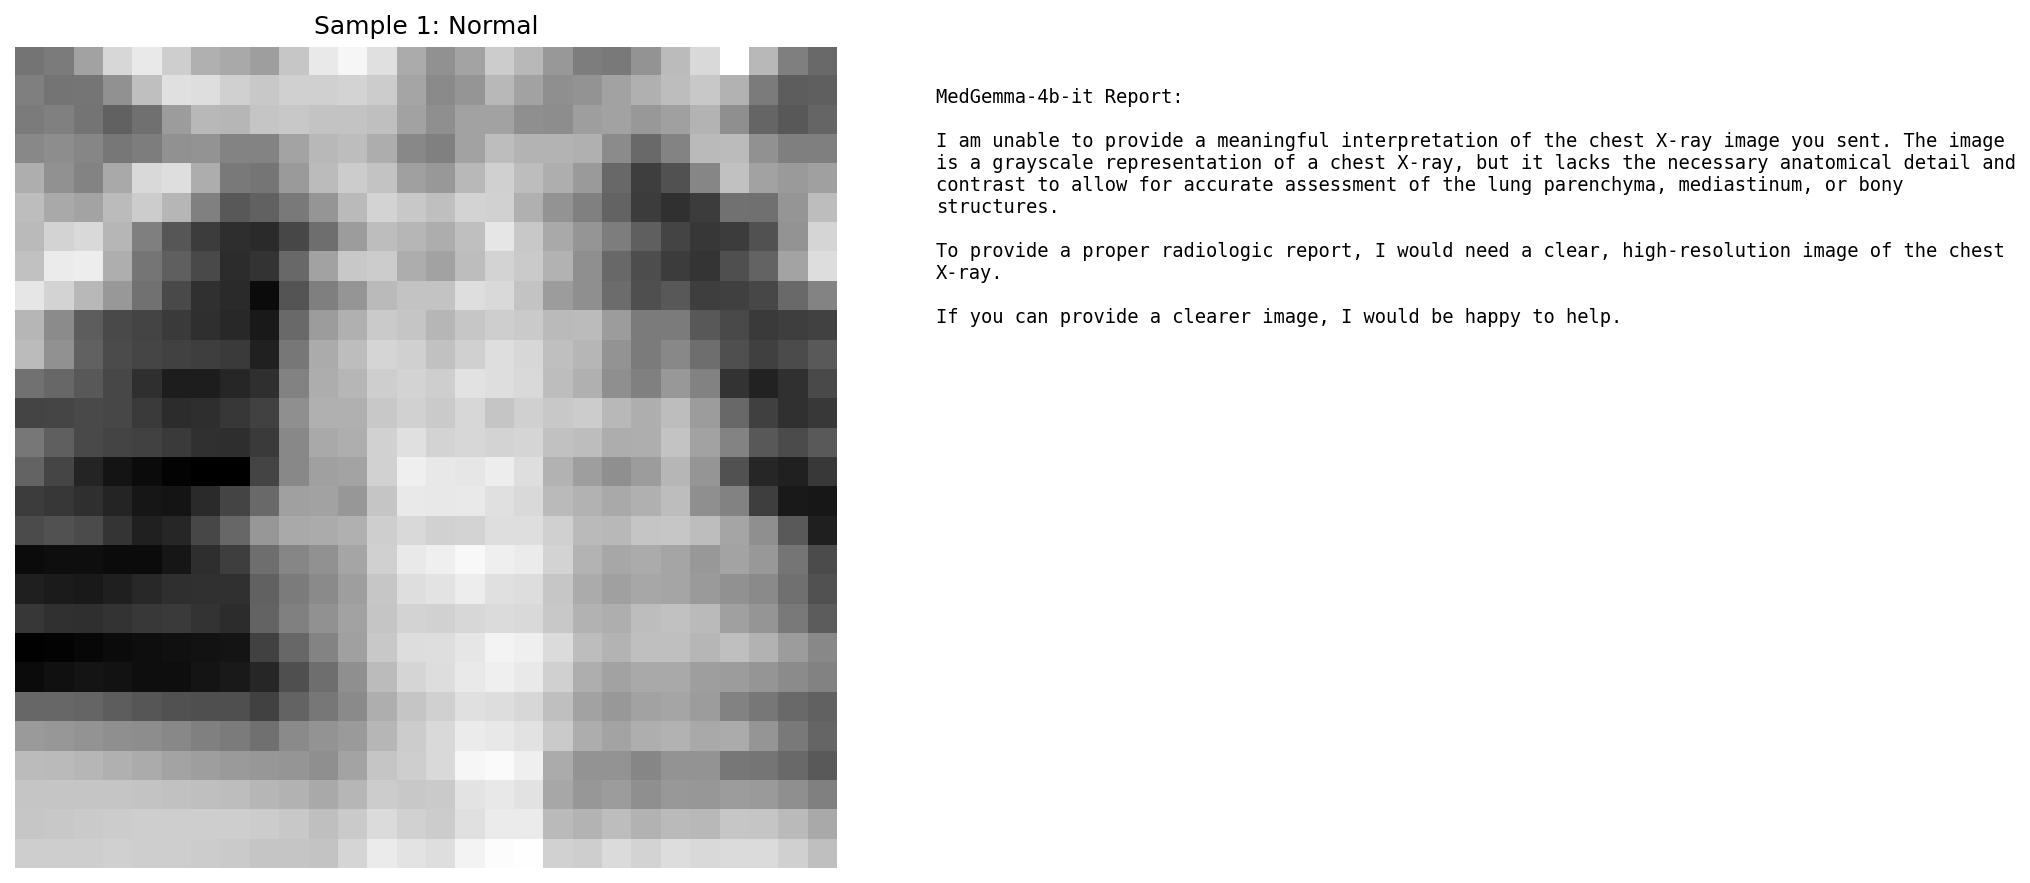


📄 sample_2_report.png:


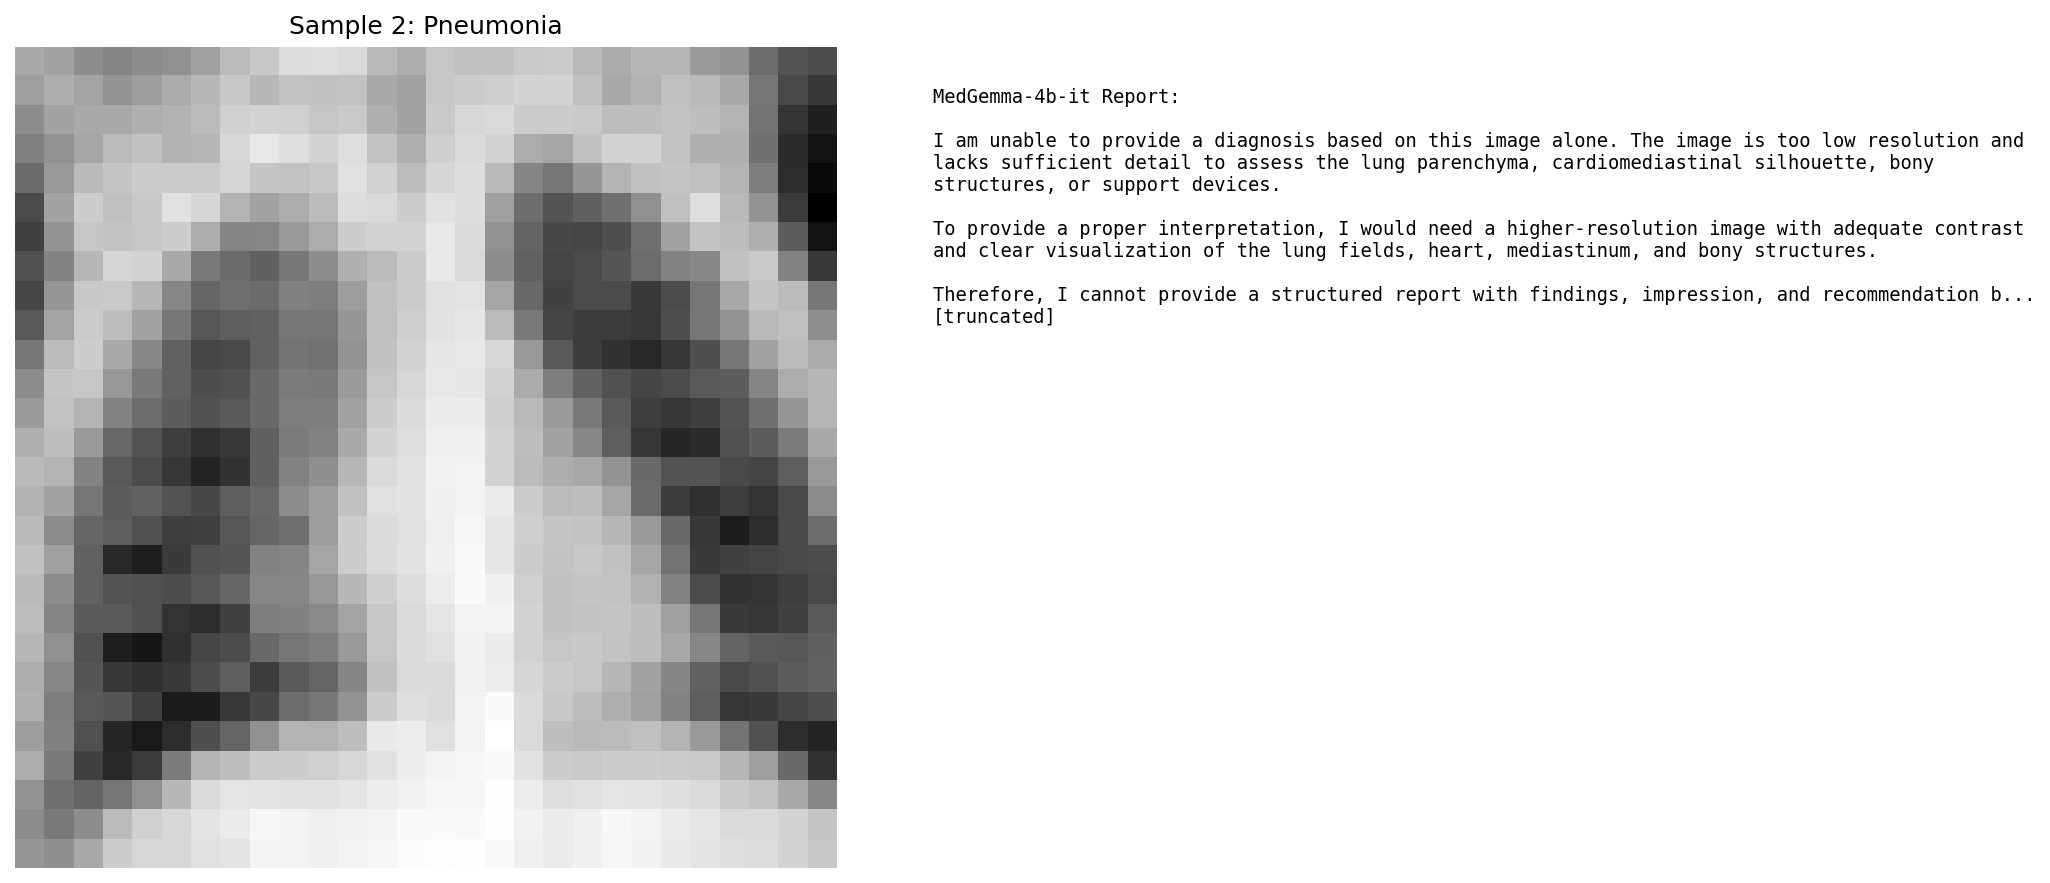

In [7]:
# @title 📝 Step 9: View Task 2 Results

import json
from IPython.display import Image, display

print("="*60)
print("TASK 2 RESULTS")
print("="*60)

# Load quality analysis
qa_file = Path('task2_report_generation/reports/task2/generated_reports/quality_analysis.json')
if qa_file.exists():
    with open(qa_file, 'r') as f:
        analysis = json.load(f)

    print("\n📊 Prompt Performance:")
    print("-"*50)
    print(f"{'Prompt':20} {'Avg Words':12} {'Agreement':12}")
    print("-"*50)
    for prompt, stats in analysis.get('prompt_analysis', {}).items():
        print(f"{prompt:20} {stats.get('avg_word_count', 0):8.0f} words  {stats.get('agreement_with_truth', 0):8.1%}")

# Display sample reports
figures_dir = Path('task2_report_generation/reports/task2/figures')
if figures_dir.exists():
    report_images = sorted(figures_dir.glob('sample_*_report.png'))
    print(f"\n📸 Found {len(report_images)} report images")

    for img_path in report_images[:3]:  # Show first 3
        print(f"\n📄 {img_path.name}:")
        display(Image(filename=str(img_path)))

In [ ]:
# @title 🔍 Step 10: Run Task 3 - Build Retrieval Index

print("="*60)
print("TASK 3: BUILD RETRIEVAL INDEX")
print("="*60)

print("\n🔄 Building index directly")
%cd task3_retrieval

# Build index
!python build_index.py --model resnet18 --split test --index_type flat

%cd ..

print("\n✅ Index built successfully!")

TASK 3: BUILD RETRIEVAL INDEX

🔄 Building index directly
/content/Postdoctoral-Technical-Challenge/Postdoctoral-Technical-Challenge/Postdoctoral-Technical-Challenge/task3_retrieval
2026-02-19 13:31:45 - __main__ - INFO - ============================================================
INFO:__main__:============================================================
2026-02-19 13:31:45 - __main__ - INFO - BUILDING SEMANTIC RETRIEVAL INDEX
INFO:__main__:BUILDING SEMANTIC RETRIEVAL INDEX
2026-02-19 13:31:45 - __main__ - INFO - ============================================================
INFO:__main__:============================================================
2026-02-19 13:31:45 - __main__ - INFO - Loading dataset...
INFO:__main__:Loading dataset...
INFO:data.data_loader:Training set size: 4708
INFO:data.data_loader:Validation set size: 524
INFO:data.data_loader:Test set size: 624
2026-02-19 13:31:45 - __main__ - INFO - Using test set with 624 images
INFO:__main__:Using test set with 624 images
202

In [ ]:
# @title 🔎 Step 11: Run Task 3 - Image Search

print("="*60)
print("TASK 3: IMAGE SEARCH")
print("="*60)

%cd task3_retrieval

# Choose search mode
print("\n📋 Select search mode:")
print("   1. Demo (both image and text)")
print("   2. Image-to-image search")
print("   3. Text-to-image search")
print("   4. Evaluation")

mode = input("\nEnter choice (1-4): ").strip()

if mode == '1':
    !python search.py --mode demo --save_results
elif mode == '2':
    !python search.py --mode image --k 5 --save_results
elif mode == '3':
    query = input("Enter text query (default: pneumonia): ").strip() or "pneumonia"
    !python search.py --mode text --query "{query}" --k 5 --save_results
elif mode == '4':
    !python search.py --mode eval --num_queries 50
else:
    print("❌ Invalid choice")

%cd ..

print("\n✅ Search completed!")

TASK 3: IMAGE SEARCH
/content/Postdoctoral-Technical-Challenge/Postdoctoral-Technical-Challenge/Postdoctoral-Technical-Challenge/task3_retrieval

📋 Select search mode:
   1. Demo (both image and text)
   2. Image-to-image search
   3. Text-to-image search
   4. Evaluation

Enter choice (1-4): 1
2026-02-19 13:32:02 - __main__ - INFO - ============================================================
INFO:__main__:============================================================
2026-02-19 13:32:02 - __main__ - INFO - IMAGE RETRIEVAL SYSTEM
INFO:__main__:IMAGE RETRIEVAL SYSTEM
2026-02-19 13:32:02 - __main__ - INFO - ============================================================
INFO:__main__:============================================================
2026-02-19 13:32:02 - __main__ - INFO - Initializing retrieval system with config: RetrievalConfig(index_name='pneumonia_retrieval', index_dir=PosixPath('models/embeddings'), model_name='resnet18', embedding_dim=512, default_k=5, similarity_threshold=0

TASK 3 RESULTS

📸 Found 2 search result images

📊 image_search_20260217_151326.png:


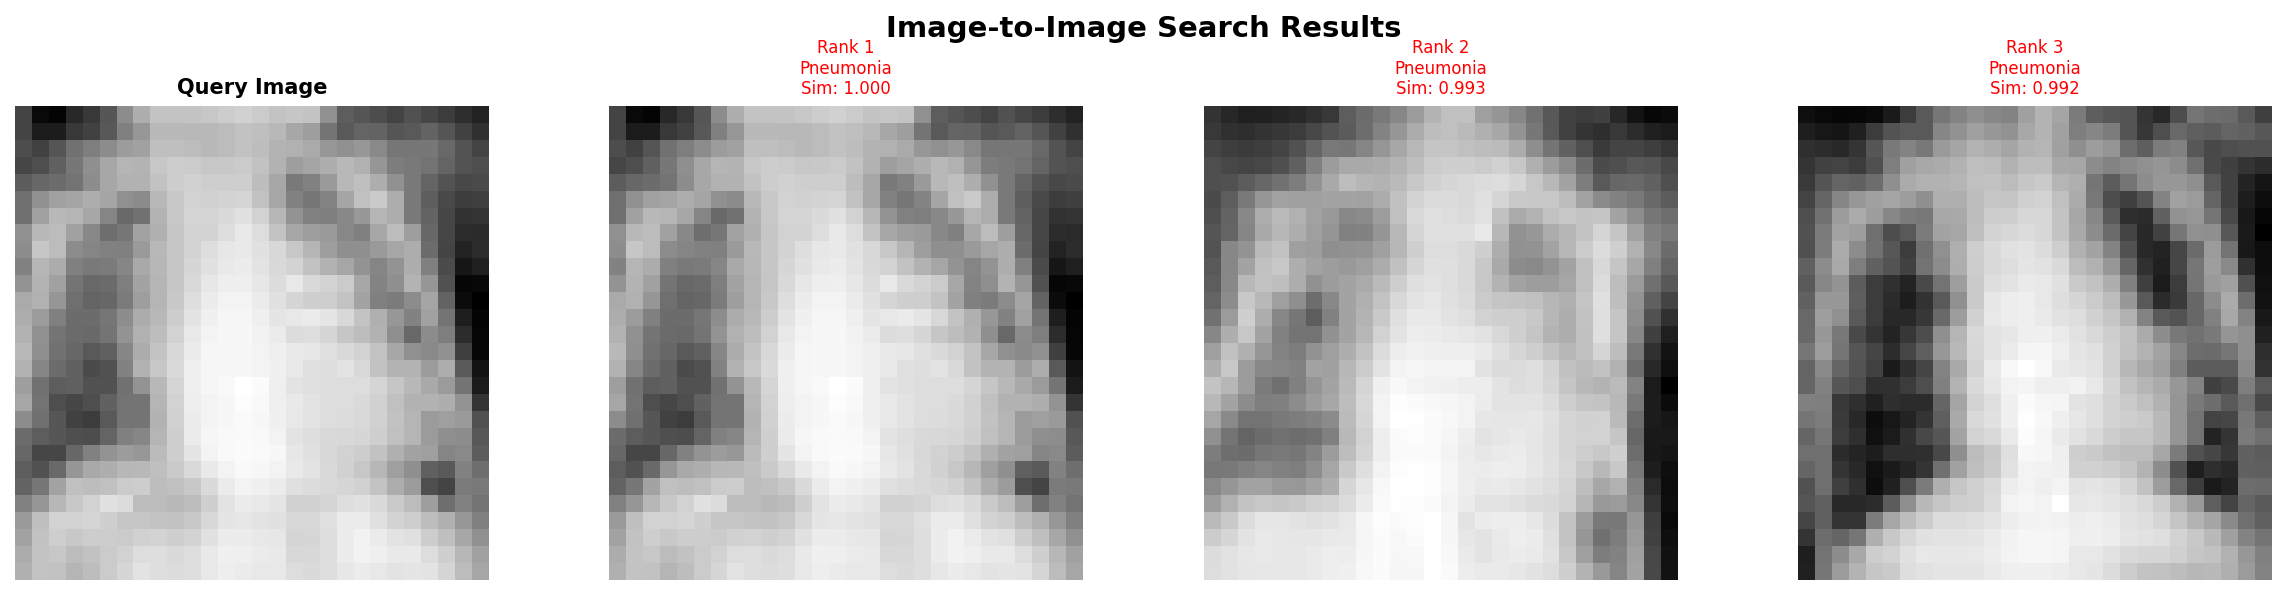


📊 text_search_20260217_151326.png:


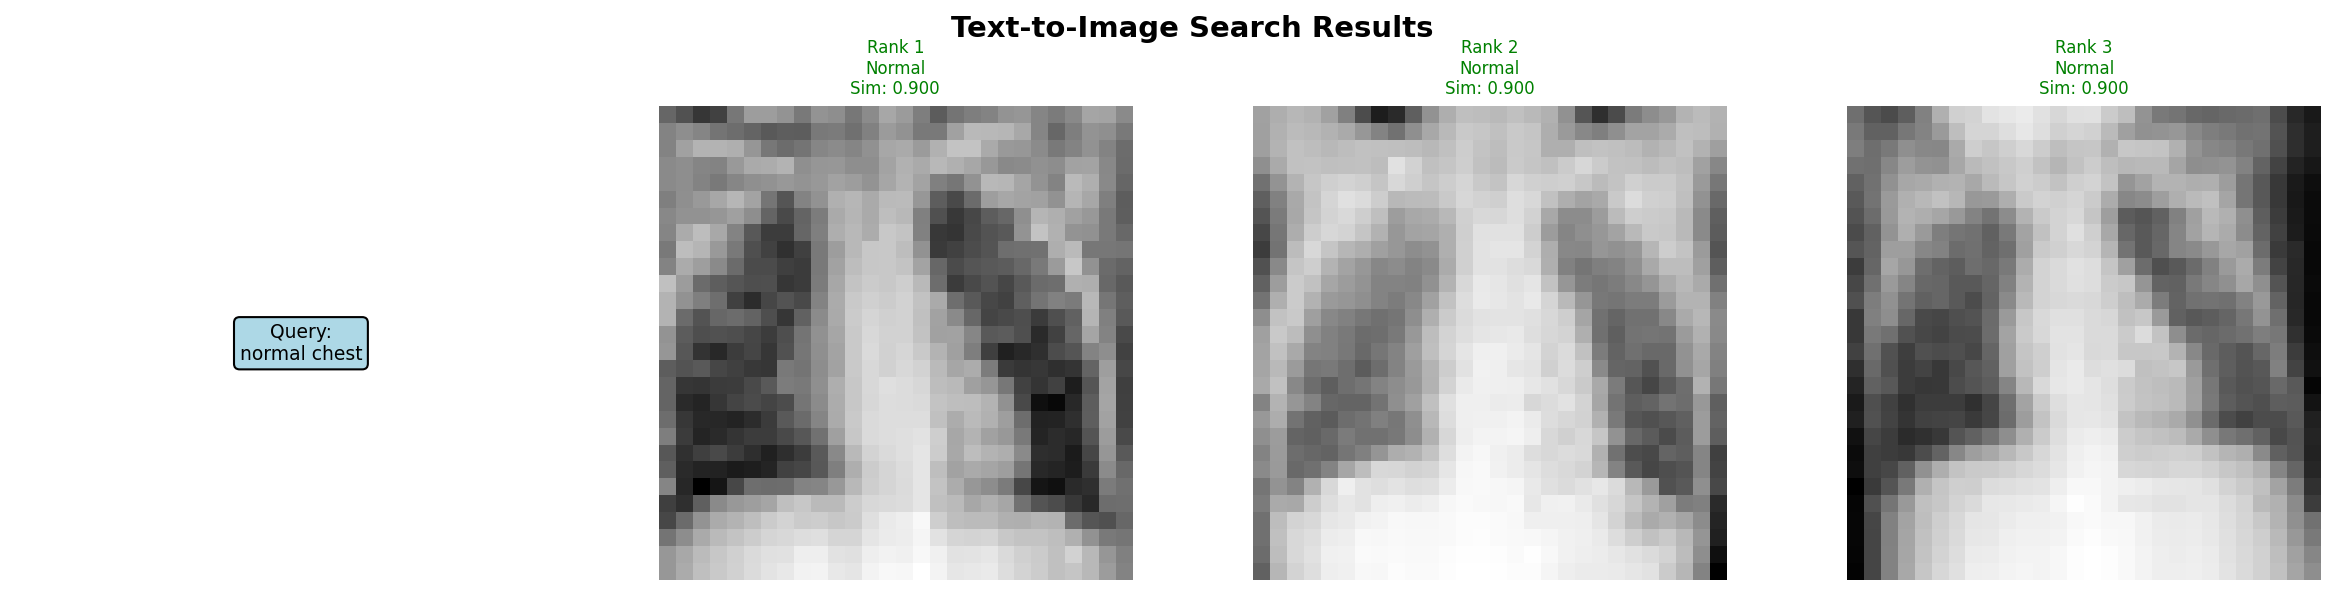

In [ ]:
# @title 🔍 Step 12: View Task 3 Results

import json
from IPython.display import Image, display

print("="*60)
print("TASK 3 RESULTS")
print("="*60)

# Load evaluation results
eval_file = Path('reports/task3/retrieval_evaluation.json')
if eval_file.exists():
    with open(eval_file, 'r') as f:
        results = json.load(f)

    print("\n📊 Retrieval Performance:")
    precisions = results.get('precision_at_k', {})
    for k, v in precisions.items():
        print(f"   {k}: {v:.4f}")
    print(f"   mAP: {results.get('mean_average_precision', 0):.4f}")

# Display search results
figures_dir = Path('reports/task3/figures')
if figures_dir.exists():
    search_images = sorted(figures_dir.glob('*_search_*.png'))
    print(f"\n📸 Found {len(search_images)} search result images")

    for img_path in search_images[:4]:  # Show first 4
        print(f"\n📊 {img_path.name}:")
        display(Image(filename=str(img_path)))

## Run All Tasks At Once

In [ ]:
# @title 🚀 Step 13: Run All Tasks (Complete Pipeline)

import time

print("="*60)
print("RUNNING COMPLETE PIPELINE")
print("="*60)

# Check token for Task 2
if not userdata.get('HF_TOKEN'):
    print("⚠️  HF_TOKEN not set! Task 2 may fail.")
    proceed = input("Continue anyway? (y/n): ").lower()
    if proceed != 'y':
        print("❌ Aborted. Please set token in Step 3 first.")
    else:
        print("⚠️  Continuing without token...")
else:
    print("✅ HF_TOKEN is set")

start_time = time.time()

# Task 1
print("\n" + "🔥"*30)
print("TASK 1: CLASSIFICATION")
print("🔥"*30)
%cd task1_classification
!python train.py --model resnet18 --epochs 1 --batch_size 32
!python evaluate.py --model_path models/saved/best_model_resnet18.pth
%cd ..

# Task 2
print("\n" + "🔥"*30)
print("TASK 2: REPORT GENERATION")
print("🔥"*30)
%cd task2_report_generation
!python generate.py --samples 2 --max_tokens 200
%cd ..

# Task 3
print("\n" + "🔥"*30)
print("TASK 3: RETRIEVAL SYSTEM")
print("🔥"*30)
%cd task3_retrieval
!python build_index.py --model resnet18
!python search.py --mode demo
%cd ..

elapsed = time.time() - start_time
print("\n" + "="*60)
print(f"✅ ALL TASKS COMPLETED in {elapsed/60:.2f} minutes!")
print("="*60)

RUNNING COMPLETE PIPELINE


NameError: name 'userdata' is not defined

In [ ]:
# @title 💾 Step 14: Save Results to Google Drive

print("="*60)
print("SAVING RESULTS TO GOOGLE DRIVE")
print("="*60)

# Check if Drive is mounted
if not os.path.exists('/content/drive'):
    print("❌ Google Drive not mounted. Please run Step 4 first.")
else:
    # Create backup folder
    !mkdir -p /content/drive/MyDrive/pneumonia_ai_results

    # Copy all results
    !cp -r reports/ /content/drive/MyDrive/pneumonia_ai_results/
    !cp -r models/saved/ /content/drive/MyDrive/pneumonia_ai_results/models/
    !cp -r models/embeddings/ /content/drive/MyDrive/pneumonia_ai_results/embeddings/

    print("\n✅ Results saved to Google Drive:")
    !ls -la /content/drive/MyDrive/pneumonia_ai_results/

SAVING RESULTS TO GOOGLE DRIVE


NameError: name 'os' is not defined

In [ ]:
# @title 📥 Step 15: Download Results

from google.colab import files
import zipfile

print("="*60)
print("DOWNLOAD RESULTS")
print("="*60)

# Create zip archives
!zip -r reports.zip reports/
!zip -r models.zip models/saved/ models/embeddings/

print("\n📁 Available files:")
!ls -lh *.zip

# Download options
print("\nSelect files to download:")
download_reports = input("Download reports.zip? (y/n): ").lower() == 'y'
download_models = input("Download models.zip? (y/n): ").lower() == 'y'

if download_reports:
    print("\n📥 Downloading reports.zip...")
    files.download('reports.zip')

if download_models:
    print("\n📥 Downloading models.zip...")
    files.download('models.zip')

print("\n✅ Download complete!")

In [ ]:
# @title 🧹 Step 16: Clean Up (Optional)

print("="*60)
print("CLEAN UP")
print("="*60)

confirm = input("This will delete all generated files. Continue? (y/n): ").lower()
if confirm == 'y':
    !rm -rf reports/
    !rm -rf models/saved/
    !rm -rf models/embeddings/
    !rm -rf task1_classification/__pycache__/
    !rm -rf task2_report_generation/__pycache__/
    !rm -rf task3_retrieval/__pycache__/
    !rm -rf utils/__pycache__/
    !rm -rf data/__pycache__/
    !rm -f *.zip
    !rm -f .env  # Remove token file (optional)
    print("\n✅ Clean up complete!")
    print("⚠️  Note: .env file with token was also removed")
else:
    print("\n✅ Clean up skipped.")